# NAC1 - IA - 4SIS

RM79861 Caio Leão Rodrigues
RM79820 Felipe Favero D'Alvia


### **R1**

Use a imagem circulo.png para implementar um código que:
Segmenta apenas os círculos maiores da imagem, use a técnica que achar melhor. E exibe o resultado. (máx 3 pontos) 
Exibe na imagem a área e o centro de massa dos dois círculos segmentados da imagem. O resultado esperado e uma imagem com um marcação no centro indicando o CM e o valor da área; (máx 3 pontos) 
Essa rubrica pode ser feita no jupyter notebook ou google Colab.


Quantidade de contornos encontrado:  2
{'m00': 38526.0, 'm10': 29973486.5, 'm01': 17587465.5, 'm20': 23438224162.833332, 'm11': 13683155448.166666, 'm02': 8146417535.166666, 'm30': 18419716462558.25, 'm21': 10699743779666.334, 'm12': 6337958757540.167, 'm03': 3826266440864.75, 'mu20': 118650551.0988617, 'mu11': -10718.408264160156, 'mu02': 117581354.05027008, 'mu30': -1050596.94921875, 'mu21': 325662.1070251465, 'mu12': 1040818.7266998291, 'mu03': -323500.70703125, 'nu20': 0.07993959048712654, 'nu11': -7.221417510289304e-06, 'nu02': 0.07921922995426021, 'nu30': -3.6062126675211885e-06, 'nu21': 1.1178471597114787e-06, 'nu12': 3.57264855909712e-06, 'nu03': -1.1104280747394864e-06}
{'m00': 38099.5, 'm10': 4764521.666666666, 'm01': 4211831.166666666, 'm20': 711899464.4166666, 'm11': 526689658.7916666, 'm02': 580568032.5833333, 'm30': 118059203074.8, 'm21': 78694810949.43333, 'm12': 72596729265.93333, 'm03': 89596984296.55, 'mu20': 116073621.2392993, 'mu11': -19637.91630256176, 'mu02': 1149

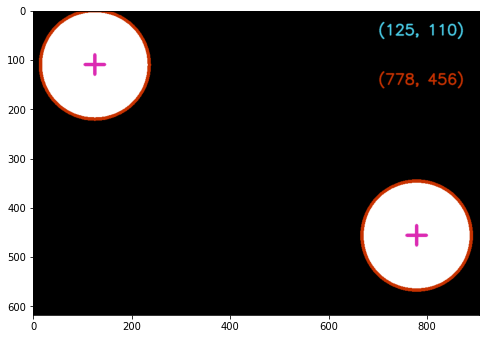

In [2]:

import cv2
from matplotlib import pyplot as plt
import numpy as np

imagem = cv2.imread('circulo.png')

imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
imagem_hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

imagem_lower_hsvAzul = np.array([85, 160, 210])  
imagem_upper_hsvAzul = np.array([95, 185, 230])
maskAzul = cv2.inRange(imagem_hsv, imagem_lower_hsvAzul, imagem_upper_hsvAzul)

imagem_lower_hsvVermelho1 = np.array([0, 100, 100])  
imagem_upper_hsvVermelho1 = np.array([10, 255, 255])
maskVermelho1 = cv2.inRange(imagem_hsv, imagem_lower_hsvVermelho1, imagem_upper_hsvVermelho1)

imagem_lower_hsvVermelho2 = np.array([170, 100, 100])  
imagem_upper_hsvVermelho2 = np.array([180, 255, 255])
maskVermelho2 = cv2.inRange(imagem_hsv, imagem_lower_hsvVermelho2, imagem_upper_hsvVermelho2)

mask_hsvVermelho = cv2.bitwise_or(maskVermelho1, maskVermelho2)

mask_hsvFinal = cv2.bitwise_or(mask_hsvVermelho, maskAzul)

contornos, _ = cv2.findContours(mask_hsvFinal, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
print("Quantidade de contornos encontrado: ", len(contornos))

mask_RBGAzul = cv2.cvtColor(maskAzul, cv2.COLOR_GRAY2RGB) 
contornos_imagemAzul = mask_RBGAzul.copy()
cv2.drawContours(contornos_imagemAzul, contornos, -1, [200,50,0], 5)


mask_RGBVermelho = cv2.cvtColor(mask_hsvVermelho, cv2.COLOR_GRAY2RGB) 
contornos_imagemVermelho = mask_RGBVermelho.copy()
cv2.drawContours(contornos_imagemVermelho, contornos, -1, [200,50,0], 5)

contornos_imagem = cv2.bitwise_or(contornos_imagemAzul, contornos_imagemVermelho)

plt.figure(figsize=(8,6))
plt.imshow(contornos_imagem)

cnt = contornos[0]

M = cv2.moments(cnt)
print( M )

cnt = contornos[1]
M2 = cv2.moments(cnt)

print( M2)


cxVermelho = int(M['m10']/M['m00'])
cyVermelho = int(M['m01']/M['m00'])

cxAzul = int(M2['m10']/M2['m00'])
cyAzul = int(M2['m01']/M2['m00'])

print("centro de massa na posição (Bola Azul): ",cxAzul, cyAzul)
print("centro de massa na posição (Bola Vermelha): ",cxVermelho, cyVermelho)

size = 20
color = (219, 42, 178)


cv2.line(contornos_imagemVermelho,(cxVermelho - size,cyVermelho),(cxVermelho + size,cyVermelho),color,5)
cv2.line(contornos_imagemVermelho,(cxVermelho,cyVermelho - size),(cxVermelho, cyVermelho + size),color,5)


cv2.line(contornos_imagemAzul,(cxAzul - size,cyAzul),(cxAzul + size,cyAzul),color,5)
cv2.line(contornos_imagemAzul,(cxAzul,cyAzul - size),(cxAzul, cyAzul + size),color,5)

cv2.line(contornos_imagem,(cxAzul,cyAzul),(cxVermelho,cyVermelho),color,5)

font = cv2.FONT_HERSHEY_SIMPLEX
text_Azul = cxAzul , cyAzul
inicio_Azul = (700,50)

font = cv2.FONT_HERSHEY_SIMPLEX
text_Vermelho = cxVermelho , cyVermelho
inicio_Vermelho = (700,150)



cv2.putText(contornos_imagemAzul, str(text_Azul), inicio_Azul, font,1,(73, 203, 230),2,cv2.LINE_AA)

cv2.putText(contornos_imagemVermelho, str(text_Vermelho), inicio_Vermelho, font,1,(200,50,0),2,cv2.LINE_AA)

contornos_imagem = cv2.bitwise_or(contornos_imagemAzul, contornos_imagemVermelho)


plt.imshow(contornos_imagem)





Grau de inclinação em radiano:  1.083545353879597
Grau de inclinação em graus:  62.08257568831015 º


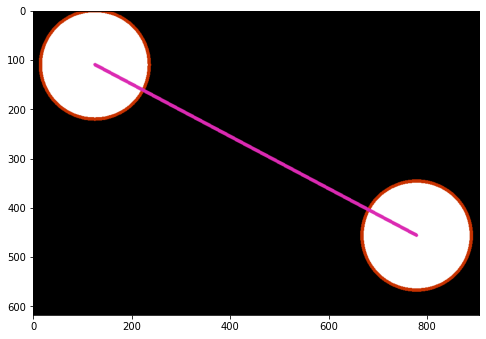

In [5]:

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

imagem = cv2.imread('circulo.png')

imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
imagem_hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

imagem_lower_hsvAzul = np.array([85, 160, 210])  
imagem_upper_hsvAzul = np.array([95, 185, 230])
maskAzul = cv2.inRange(imagem_hsv, imagem_lower_hsvAzul, imagem_upper_hsvAzul)

imagem_lower_hsvVermelho1 = np.array([0, 100, 100])  
imagem_upper_hsvVermelho1 = np.array([10, 255, 255])
maskVermelho1 = cv2.inRange(imagem_hsv, imagem_lower_hsvVermelho1, imagem_upper_hsvVermelho1)

imagem_lower_hsvVermelho2 = np.array([170, 100, 100])  
imagem_upper_hsvVermelho2 = np.array([180, 255, 255])
maskVermelho2 = cv2.inRange(imagem_hsv, imagem_lower_hsvVermelho2, imagem_upper_hsvVermelho2)

mask_hsvVermelho = cv2.bitwise_or(maskVermelho1, maskVermelho2)

mask_hsvFinal = cv2.bitwise_or(mask_hsvVermelho, maskAzul)

contornos, _ = cv2.findContours(mask_hsvFinal, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 


mask_RBGAzul = cv2.cvtColor(maskAzul, cv2.COLOR_GRAY2RGB) 
contornos_imagemAzul = mask_RBGAzul.copy() 
cv2.drawContours(contornos_imagemAzul, contornos, -1, [200,50,0], 5)


mask_RGBVermelho = cv2.cvtColor(mask_hsvVermelho, cv2.COLOR_GRAY2RGB) 
contornos_imagemVermelho = mask_RGBVermelho.copy() 
cv2.drawContours(contornos_imagemVermelho, contornos, -1, [200,50,0], 5)

contornos_imagem = cv2.bitwise_or(contornos_imagemAzul, contornos_imagemVermelho)

plt.figure(figsize=(8,6))


cnt = contornos[0]

M = cv2.moments(cnt)


cnt = contornos[1]
M2 = cv2.moments(cnt)



cxVermelho = int(M['m10']/M['m00'])
cyVermelho = int(M['m01']/M['m00'])


cxAzul = int(M2['m10']/M2['m00'])
cyAzul = int(M2['m01']/M2['m00'])


size = 20
color = (219, 42, 178)


cv2.line(contornos_imagemVermelho,(cxVermelho - size,cyVermelho),(cxVermelho + size,cyVermelho),color,5)
cv2.line(contornos_imagemVermelho,(cxVermelho,cyVermelho - size),(cxVermelho, cyVermelho + size),color,5)

cv2.line(contornos_imagemAzul,(cxAzul - size,cyAzul),(cxAzul + size,cyAzul),color,5)
cv2.line(contornos_imagemAzul,(cxAzul,cyAzul - size),(cxAzul, cyAzul + size),color,5)

cv2.line(contornos_imagem,(cxAzul,cyAzul),(cxVermelho,cyVermelho),color,5)

font = cv2.FONT_HERSHEY_SIMPLEX
text_Azul = cxAzul , cyAzul
inicio_Azul = (700,50)

font = cv2.FONT_HERSHEY_SIMPLEX
text_Vermelho = cxVermelho , cyVermelho
inicio_Vermelho = (700,150)

cv2.putText(contornos_imagemAzul, str(text_Azul), inicio_Azul, font,1,(73, 203, 230),2,cv2.LINE_AA)

cv2.putText(contornos_imagemVermelho, str(text_Vermelho), inicio_Vermelho, font,1,(200,50,0),2,cv2.LINE_AA)


x = (cxVermelho - cxAzul)
y = (cyVermelho - cyAzul)

inclinacao = math.atan2(x, y)

plt.imshow(contornos_imagem)


pi = math.pi

incliGraus = ((inclinacao*180)/pi)

print("Grau de inclinação em radiano: ", inclinacao)

print("Grau de inclinação em graus: ",incliGraus,"º")


